In [1]:
from torchvision.datasets.mnist import MNIST
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# 학습 데이터 로드
train_data = MNIST(root='./',train=True,download=True,transform=ToTensor())

# 테스트 데이터 로드
test_data = MNIST(root='./',train=False,download=True,transform=ToTensor())

100.0%
100.0%
100.0%
100.0%


In [ ]:
# 데이터 형태 확인
train_data.data.size()

torch.Size([60000, 28, 28])

In [ ]:
# 학습데이터의 결과 정보 확인
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

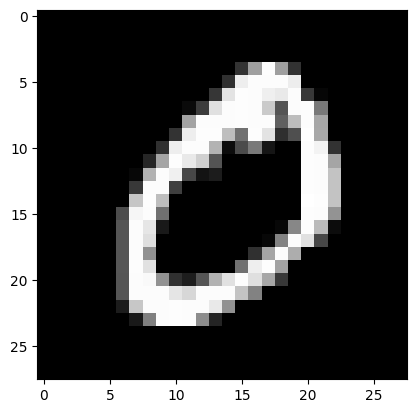

In [ ]:
# 데이터 이미지화 
plt.imshow(train_data.data[1],cmap='gray')
plt.show()

In [ ]:
# 학습데이터를 1배치(32개데이터)사이즈로 랜덤하게 슬라이스
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)

# 테스트 데이터를 1배치(32개데이터)사이즈로 슬라이스
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [ ]:
model = nn.Sequential(
    # 28*28 크기의 이미지 데이터를 받아서 64차원으로 반환
    nn.Linear(784,64),

    # 비선형성을 추가하기위해 활성화 함수를 거침
    nn.ReLU(),

    # 64차원의 데이터를 받아서 32차원으로 압축
    nn.Linear(64,32),

    # 비선형성을 추가하기위해 활성화 함수를 거침
    nn.ReLU(),

    # 32차원의 데이터를 10개의 숫자로 반환 ( )
    nn.Linear(32,10)
)

model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
# GPU를 사용할 수 있는 상태면 cuda를 지정 , 사용할 수 없으면 CPU를 지정하여 GPU가 준비된경우 사용 할 수 있도록 준비
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [ ]:
# 모델을 GPU(CPU)에 올린다
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
from torch.optim.adam import Adam

# 모델을 학습 ( 0.03 의 보폭으로 학습 )
optim = Adam(model.parameters(), lr = 1e-3)

# 손실률을 얻어옴
criterion = nn.CrossEntropyLoss()

# 전체 데이터를 20번 학습
epochs = 20

for epoch in range(epochs):
    for data,label in train_loader:
        # 기울기 초기화
        optim.zero_grad()

        # 각 1행 784열로 변환
        data = torch.reshape(data,(-1,784))

        # 데이터를 GPU(CPU)에 올림
        data = data.to(device)

        # 학습
        pred = model(data)

        # 손실률
        loss = criterion(pred,label.to(device))

        # 역전파 수행
        loss.backward()

        # 가중치 셋업
        optim.step()
    
    print('epoch : ' , loss)



In [ ]:
# 학습을 종료한다.
model.eval()

total = 0
correct = 0

# 평가나 추론시 기록 의미 없다.
with torch.no_grad():
    # 테스트
    for data,label in test_loader:
        # 1행마다 784열의 데이터로 변환(28*28사이즈)
        data = torch.reshape(data,(-1,784))

        # 데이터를 GPU(CPU) 에 올림
        data = data.to(device)

        # 데이터를 모델에 학습 시킴
        pred = model(data)

        # 테스트 데이터의 결과를 GPU(CPU)에 올림
        label = label.to(device)

        # 학습결과로 나온 숫자중 가장 큰수의 인덱스를 가져옴 ( 숫자, 인덱스로 반환하는데 인덱스만 사용)
        _, predresult = torch.max(pred, 1)

        # 학습결과 가장 큰수의 인덱스와 결과값을 확인
        print(predresult)
        print(label)

        # 학습결과와 테스트 결과값이 일치하는 경우의 합
        correct += (predresult == label).sum().item()

        # 전체 학습량
        total += label.size(0)


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5,

In [ ]:
# 정확률
correct / total

0.9747

In [ ]:
# torch.max = > 가장큰수, 인덱스 반환
torch.max(torch.tensor([[1,2,3,4,5]]),1)

torch.return_types.max(
values=tensor([5]),
indices=tensor([4]))

In [24]:
(predresult == label).sum() / 32

tensor(0.9688, device='cuda:0')

In [25]:
label.size()

torch.Size([32])